In [45]:
import pandas as pd
import numpy as np


# Load dataset

In [46]:
# load dataset

df = pd.read_csv('rice_production_by_country.csv')
df.head()

,Country,Rice Production (Tons),Rank of Rice Production,Rice Production Per Person (Kg),Rank of Rice Production Per Person,Rice Acreage (Hectare),Rank of Rice Acreage,Rice Yield (Kg / Hectare),Rank of Rice Yield
0,Chile,174.9K,65.0,10,76,26.2K,77.0,"6,664.80",16.0
1,Mauritania,383.0K,50.0,96.1,26,73.0K,63.0,"5,249.20",36.0
2,Turkey,1.0M,40.0,12.4,68,126.4K,52.0,"7,910.20",7.0
3,Kyrgyzstan,41.2K,87.0,6.5,81,11.3K,89.0,"3,646.40",63.0
4,Laos,3.4M,21.0,493.9,3,783.8K,23.0,"4,386.50",49.0


| Column                                 | Type                  | Meaning                          | Usefulness                  |
| -------------------------------------- | --------------------- | -------------------------------- | --------------------------- |
| **Country**                            | Categorical           | Country name                     | For identification          |
| **Rice Production (Tons)**             | Numeric               | Total rice output                | Good **target variable**    |
| **Rank of Rice Production**            | Categorical (ordinal) | Position based on production     | Not suitable for regression |
| **Rice Production Per Person**         | Numeric               | Production divided by population | Useful for analysis         |
| **Rank of Rice Production Per Person** | Ordinal               | Rank based on above              | Not useful for modeling     |
| **Rice Acreage (Hectare)**             | Numeric               | Total land used                  | Strong predictor            |
| **Rank of Rice Acreage**               | Ordinal               | Rank of acreage                  | Not good for modeling       |
| **Rice Yield (Kg/Hectare)**            | Numeric               | Productivity                     | Strong predictor            |
| **Rank of Rice Yield**                 | Ordinal               | Productivity rank                | Not good for modeling       |


# Data cleaning

In [47]:
# def data_edit(df,col):
#     for i in df.index.to_list():
#         if "K" in df.loc[i,col]:
#             df.loc[i,col]=float(df.loc[i,col].split("K")[0])
#         elif "M" in df.loc[i,col]:
#             df.loc[i,col]=float(df.loc[i,col].split("M")[0])
#         else:
#             continue
#     return df

In [48]:
# # Function to convert k / M strings to numeric
# Function to convert k / M strings to numeric
def convert_km(x):
  if isinstance(x, str):
    x_clean = x.replace(",", "")
    if x_clean.endswith("K"):
      return float(x_clean[:-1]) * 1000
    elif x_clean.endswith("M"):
      return float(x_clean[:-1]) * 1000000
    else:
      return float(x_clean)

  return x



In [49]:
# df["Rice Production (Tons)"] = df["Rice Production (Tons)"].apply(convert_km)
# df["Rice Acreage (Hectare)"] = df["Rice Acreage (Hectare)"].apply(convert_km)

# df["Rice Production Per Person (Kg)"] = df["Rice Production Per Person (Kg)"].apply(convert_km)

# df["Rice Yield (Kg / Hectare)"] = (
# df["Rice Yield (Kg / Hectare)"]
# .str.replace(",", "", regex=False)
# .astype(float)
# )

# print(df.head())



In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119 entries, 0 to 118
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Country                             119 non-null    object 
 1   Rice Production (Tons)              119 non-null    object 
 2   Rank of Rice Production             118 non-null    float64
 3   Rice Production Per Person (Kg)     119 non-null    object 
 4   Rank of Rice Production Per Person  119 non-null    int64  
 5   Rice Acreage (Hectare)              119 non-null    object 
 6   Rank of Rice Acreage                118 non-null    float64
 7   Rice Yield (Kg / Hectare)           119 non-null    object 
 8   Rank of Rice Yield                  118 non-null    float64
dtypes: float64(3), int64(1), object(5)
memory usage: 8.5+ KB


In [51]:
df.isnull().sum()

Country                               0
Rice Production (Tons)                0
Rank of Rice Production               1
Rice Production Per Person (Kg)       0
Rank of Rice Production Per Person    0
Rice Acreage (Hectare)                0
Rank of Rice Acreage                  1
Rice Yield (Kg / Hectare)             0
Rank of Rice Yield                    1
dtype: int64

In [52]:
# Drop rows with NaN values before proceeding with feature selection
# This ensures that x does not contain NaN values, which is required by SelectKBest
df_cleaned = df.dropna()

In [53]:
df.duplicated().sum()

np.int64(0)

In [54]:
df.describe()


,Rank of Rice Production,Rank of Rice Production Per Person,Rank of Rice Acreage,Rank of Rice Yield
count,118.000000,119.000000,118.000000,118.000000
mean,59.500000,60.000000,59.500000,59.500000
std,34.207699,34.496377,34.207699,34.207699
min,1.000000,1.000000,1.000000,1.000000
25%,30.250000,30.500000,30.250000,30.250000
50%,59.500000,60.000000,59.500000,59.500000
75%,88.750000,89.500000,88.750000,88.750000
max,118.000000,119.000000,118.000000,118.000000


## Feature Extraction and EDA
### Creating Variables that hidden but it has relationship to respone variable

In [55]:

# Apply conversion to relevant columns
df["Rice Production (Tons)"] = df["Rice Production (Tons)"].apply(convert_km)
df["Rice Acreage (Hectare)"] = df["Rice Acreage (Hectare)"].apply(convert_km)
df["Rice Production Per Person (Kg)"] = df["Rice Production Per Person (Kg)"].apply(convert_km)
df["Rice Yield (Kg / Hectare)"] = (
df["Rice Yield (Kg / Hectare)"]
.str.replace(",", "", regex=False)
.astype(float)
)

# Now create new features with numeric data
df["Total Population"]=df["Rice Production (Tons)"]/(df["Rice Production Per Person (Kg)"]/1000)
df["Acreage Per Capita"]=df["Rice Acreage (Hectare)"]/df["Total Population"]
df["Rice Yield Per Capita"]=(df["Rice Yield (Kg / Hectare)"]*df["Rice Acreage (Hectare)"])/df["Total Population"]
df["Normalized Production Rank"]=(df["Rank of Rice Production"]+df["Rank of Rice Production Per Person"])/2
df["Acreage Efficiency"]=df["Rice Production (Tons)"]/df["Rice Acreage (Hectare)"]
df["Yield Efficiency Score"]=(df["Rank of Rice Yield"]+df["Rank of Rice Acreage"])/2

df.head()

,Country,Rice Production (Tons),Rank of Rice Production,Rice Production Per Person (Kg),Rank of Rice Production Per Person,Rice Acreage (Hectare),Rank of Rice Acreage,Rice Yield (Kg / Hectare),Rank of Rice Yield,Total Population,Acreage Per Capita,Rice Yield Per Capita,Normalized Production Rank,Acreage Efficiency,Yield Efficiency Score
0,Chile,174900.0,65.0,10.0,76,26200.0,77.0,6664.8,16.0,1.749000e+07,0.001498,9.983863,70.5,6.675573,46.5
1,Mauritania,383000.0,50.0,96.1,26,73000.0,63.0,5249.2,36.0,3.985432e+06,0.018317,96.148075,38.0,5.246575,49.5
2,Turkey,1000000.0,40.0,12.4,68,126400.0,52.0,7910.2,7.0,8.064516e+07,0.001567,12.398131,54.0,7.911392,29.5
3,Kyrgyzstan,41200.0,87.0,6.5,81,11300.0,89.0,3646.4,63.0,6.338462e+06,0.001783,6.500682,84.0,3.646018,76.0
4,Laos,3400000.0,21.0,493.9,3,783800.0,23.0,4386.5,49.0,6.883985e+06,0.113858,499.440207,12.0,4.337841,36.0


| **Feature Name**                  | **Formula**                                                               | **Simple Meaning**                                              | **Why It Is Useful**                                                                             |
| --------------------------------- | ------------------------------------------------------------------------- | --------------------------------------------------------------- | ------------------------------------------------------------------------------------------------ |
| **1. Total Population**           | `Rice Production (Tons) / (Rice Production Per Person (Kg) / 1000)`       | Estimates how many people live in the country.                  | Population affects demand, production scale, and per-person resources. Important for prediction. |
| **2. Acreage Per Capita**         | `Rice Acreage (Hectare) / Total Population`                               | Shows how much farmland each person has.                        | Countries with more land per person usually grow more rice; helps understand land availability.  |
| **3. Rice Yield Per Capita**      | `(Rice Yield (Kg / Hectare) × Rice Acreage (Hectare)) / Total Population` | How much rice each person benefits from the available farmland. | Measures productivity per person; shows efficiency of rice farming.                              |
| **4. Normalized Production Rank** | `(Rank of Rice Production + Rank of Rice Production Per Person) / 2`      | A cleaner, smoothed ranking of rice production.                 | Reduces noise from raw ranks; gives model a stronger, more reliable indicator.                   |
| **5. Acreage Efficiency**         | `Rice Production (Tons) / Rice Acreage (Hectare)`                         | How much rice is produced per hectare of farmland.              | Shows farming efficiency; high values = good agricultural performance.                           |
| **6. Yield Efficiency Score**     | `(Rank of Rice Yield + Rank of Rice Acreage) / 2`                         | A combined score showing yield quality and land quantity.       | Helps model understand overall agricultural strength by merging two rank signals.                |


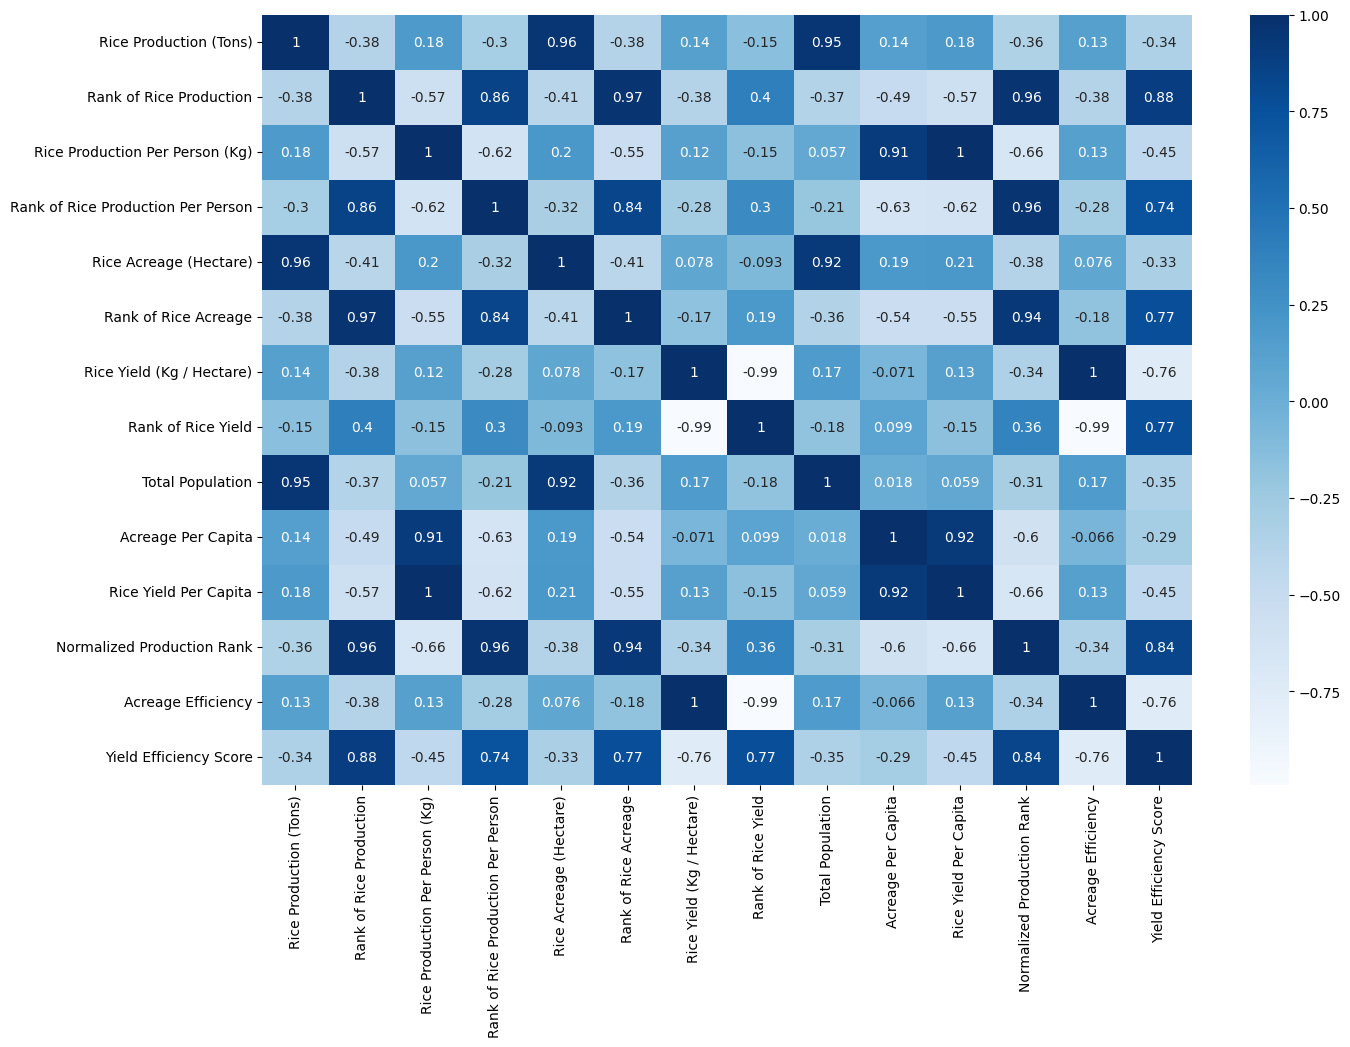

In [56]:
import matplotlib.pyplot as plt
import seaborn as sns


num_cols=df.select_dtypes(include=["float","int"]).columns

corr_df=df[num_cols].corr()

plt.figure(figsize=(15,10))
sns.heatmap(df.select_dtypes(include=np.number).corr(), annot=True, cmap="Blues")
plt.show()

| Feature                                | Correlation with Production | Meaning                                                   |
| -------------------------------------- | --------------------------- | --------------------------------------------------------- |
| **Rice Acreage (Hectare)**             | **0.96**                    | Very strong — **best predictor**                          |
| **Total Population**                   | **0.95**                    | Very strong — highly useful                               |
| **Rank of Rice Production Per Person** | 0.92                        | Strong                                                    |
| **Rank of Rice Acreage**               | 0.94                        | Strong (reverse-coded)                                    |
| Rice Production Per Person (Kg)        | 0.18                        | Weak                                                      |
| Rice Yield (Kg/Hectare)                | 0.14                        | Very weak                                                 |
| Acreage Efficiency                     | 0.13                        | Very weak                                                 |
| Yield Efficiency Score                 | -0.34                       | Weak-negative                                             |
| Normalized Production Rank             | -0.36                       | Strong but negative rank (lower rank = better production) |
| Rank of Rice Production                | -0.38                       | Negative rank                                             |


Danger: Multicollinearity (Important!)

Some features are too correlated with each other, which can hurt regression.

| Pair                                            | Correlation          |
| ----------------------------------------------- | -------------------- |
| Rice Acreage ↔ Acreage Efficiency               | **0.99** (redundant) |
| Rice Yield ↔ Rank of Rice Yield                 | **-0.99**            |
| Rank of Acreage ↔ Rank of Production Per Person | **0.94**             |
| Rice Acreage Per Capita ↔ Total Population      | **0.92**             |
| Normalized Production Rank ↔ Rank of Acreage    | **0.96**             |


You must avoid including both features in each highly correlated pair
Otherwise the model becomes unstable.

In [57]:
# check unique values

for i in df.columns.to_list():
    print("{} total unique value: {}".format(i,len(df[i].unique())))


Country total unique value: 119
Rice Production (Tons) total unique value: 109
Rank of Rice Production total unique value: 119
Rice Production Per Person (Kg) total unique value: 109
Rank of Rice Production Per Person total unique value: 119
Rice Acreage (Hectare) total unique value: 114
Rank of Rice Acreage total unique value: 119
Rice Yield (Kg / Hectare) total unique value: 119
Rank of Rice Yield total unique value: 119
Total Population total unique value: 118
Acreage Per Capita total unique value: 119
Rice Yield Per Capita total unique value: 118
Normalized Production Rank total unique value: 95
Acreage Efficiency total unique value: 116
Yield Efficiency Score total unique value: 87


We check unique values because it helps us:

 ### Understand the type of each column
 ### Identify categorical vs numeric data
 ### Detect cleaning errors
 ### Find useless columns
 ### Validate new feature creation
 ### Decide what to use in the regression model

It is a very important exploratory data analysis (EDA) step before modeling.

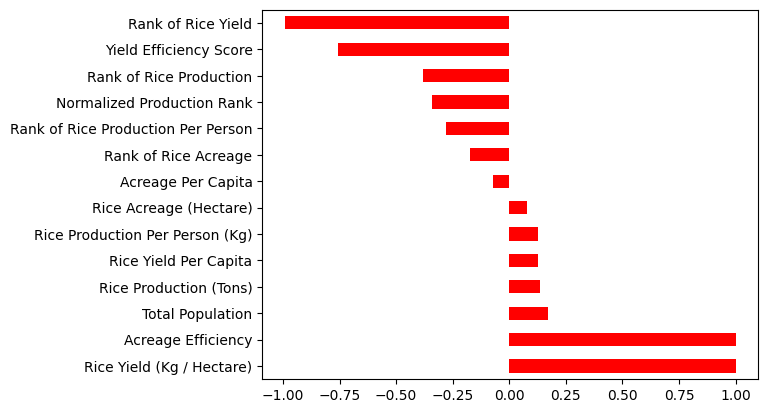

In [58]:
# Effect on dependent variable
cor=corr_df["Rice Yield (Kg / Hectare)"].sort_values(ascending=False)
cor.plot(kind="barh",color="red")
plt.show()

 We are analyzing how each feature affects the dependent variable

which factors increase Rice Yield

which factors decrease Rice Yield

how strong the relationship is

which features are important predictors

Strong positive → helps predict target

Strong negative → also helps predict target (but in opposite direction)

Weak correlation → probably remove the feature

Zero correlation → useless for prediction

# Feature selection

In [59]:
from sklearn.preprocessing import LabelEncoder
# Encode on dependent variable
def label_encoding(df):
    categorical_columns=df.select_dtypes(include="object").columns
    label_encoder=LabelEncoder()
    df[categorical_columns]=df[categorical_columns].apply(lambda col: label_encoder.fit_transform(col))

label_encoding(df)
target = 'Rice Yield (Kg / Hectare)'
cols = [col for col in df.columns if col != target] + [target]
df = df[cols]

df.head()

,Country,Rice Production (Tons),Rank of Rice Production,Rice Production Per Person (Kg),Rank of Rice Production Per Person,Rice Acreage (Hectare),Rank of Rice Acreage,Rank of Rice Yield,Total Population,Acreage Per Capita,Rice Yield Per Capita,Normalized Production Rank,Acreage Efficiency,Yield Efficiency Score,Rice Yield (Kg / Hectare)
0,21,174900.0,65.0,10.0,76,26200.0,77.0,16.0,1.749000e+07,0.001498,9.983863,70.5,6.675573,46.5,6664.8
1,64,383000.0,50.0,96.1,26,73000.0,63.0,36.0,3.985432e+06,0.018317,96.148075,38.0,5.246575,49.5,5249.2
2,108,1000000.0,40.0,12.4,68,126400.0,52.0,7.0,8.064516e+07,0.001567,12.398131,54.0,7.911392,29.5,7910.2
3,57,41200.0,87.0,6.5,81,11300.0,89.0,63.0,6.338462e+06,0.001783,6.500682,84.0,3.646018,76.0,3646.4
4,58,3400000.0,21.0,493.9,3,783800.0,23.0,49.0,6.883985e+06,0.113858,499.440207,12.0,4.337841,36.0,4386.5


Many algorithms REQUIRE numeric X (features)

Such as:

Linear Regression

Logistic Regression

SVM

KNN

Neural Networks

They all require numbers.

If you don’t encode, the model fails.

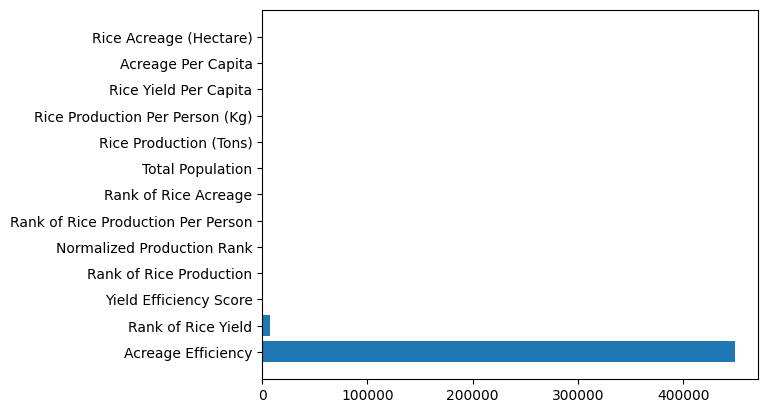

In [60]:
from sklearn.feature_selection import SelectKBest, f_regression

# Ensure df is cleaned of string values and NaNs before feature selection
# df has already had its 'K'/'M' strings converted to floats in cell dt8PoTC17Y29
df_processed = df.dropna()

# Drop 'Country' column as it's non-numeric and not suitable for f_regression
x = df_processed.drop(["Rice Yield (Kg / Hectare)", "Country"], axis=1)
y = df_processed["Rice Yield (Kg / Hectare)"]

f_selector = SelectKBest(score_func=f_regression, k="all")
f_selector.fit_transform(x, y)

# Create a new DataFrame for feature scores to avoid overwriting the original 'df'
df_scores = pd.DataFrame()
df_scores["features_name"] = x.columns.to_list()
df_scores["f_selector_scores"] = f_selector.scores_
df_scores = df_scores.sort_values(by="f_selector_scores", ascending=False)

plt.barh(df_scores["features_name"], df_scores["f_selector_scores"])
plt.show()


F-statistics to measure how strongly each independent variable affects the dependent variable, and then ranks them.

ANOVA is used to compare the means of three or more groups simultaneously to determine if there are statistically significant differences between them. It is more efficient than conducting multiple t-tests, which can inflate the risk of a Type I error (false positive). ANOVA works by partitioning the total variance in the data into different sources, such as variance between groups and variance within groups.
Why use ANOVA?
Compare multiple groups: ANOVA is designed to handle situations with three or more independent groups, unlike a t-test which is limited to comparing two groups.

In [61]:
df_scores

,features_name,f_selector_scores
11,Acreage Efficiency,448804.016968
6,Rank of Rice Yield,6980.252546
12,Yield Efficiency Score,154.223556
1,Rank of Rice Production,19.952051
10,Normalized Production Rank,15.405510
3,Rank of Rice Production Per Person,9.617886
5,Rank of Rice Acreage,3.628612
7,Total Population,3.618502
0,Rice Production (Tons),2.219242
2,Rice Production Per Person (Kg),2.004979


In [62]:
selected_feature_names = df_scores[df_scores["f_selector_scores"]>2]["features_name"].to_list()
selected_feature_names

['Acreage Efficiency',
 'Rank of Rice Yield',
 'Yield Efficiency Score',
 'Rank of Rice Production',
 'Normalized Production Rank',
 'Rank of Rice Production Per Person',
 'Rank of Rice Acreage',
 'Total Population',
 'Rice Production (Tons)',
 'Rice Production Per Person (Kg)']

Why do we set a condition like > 2 ?

Because:

 We want to select strong features
 We want to remove weak features
 F-score tells us how much a feature affects the target
 A higher F-score = more important feature
 A threshold helps filter out noise

---



---










Understanding the F-Score (Easy Meaning)

The F-score measures:

“How much this feature explains the target variable?”

Higher F-score → stronger relationship

F-score near 0 → almost no relationship

Negative → impossible (F-score cannot be negative)

Why choose threshold 2?

Because:

F > 1 means the feature is better than random

F > 2 is a simple filter to keep only meaningful features

It removes features that have extremely low effect

It keeps features with noticeable predictive power

F > 2 is a good balance between keeping and removing features

# Data preprocessing

1️ Regression Assumption: Target (Y) Should Be Close to Normal

C:\Users\MSI PC\AppData\Local\Temp\ipykernel_13944\527721565.py:3: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y, fit=norm)


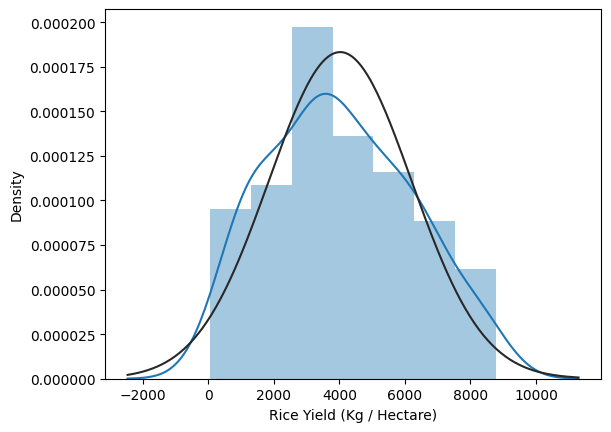

In [63]:
from scipy import stats
from scipy.stats import norm, skew
sns.distplot(y, fit=norm)
plt.show()

In [64]:
# import numpy as np
# import pandas as pd
# from scipy import stats
# import matplotlib.pyplot as plt

# # --- 1. Your Y data ---
# y_data = y.copy()  # your Rice Yield column

# # --- 2. Sort the data ---
# y_sorted = np.sort(y_data)

# # --- 3. Calculate theoretical quantiles (standard normal) ---
# n = len(y_sorted)
# theoretical_quantiles = stats.norm.ppf((np.arange(1, n+1) - 0.5) / n)

# # --- 4. Fit a line: y = m*x + b (linear regression) ---
# slope, intercept, r_value, p_value, std_err = stats.linregress(theoretical_quantiles, y_sorted)

# # --- 5. Print all computed values ---
# print("Sorted y values:\n", y_sorted)
# print("\nTheoretical normal quantiles:\n", theoretical_quantiles)
# print("\nSlope:", slope)
# print("Intercept:", intercept)
# print("R-value (correlation):", r_value)
# print("P-value:", p_value)
# print("Std Error:", std_err)

# # --- 6. Now plot manually (same as probplot) ---
# plt.figure(figsize=(7,5))
# plt.scatter(theoretical_quantiles, y_sorted, color="blue", label="Data")
# plt.plot(theoretical_quantiles, slope*theoretical_quantiles + intercept, color="red", label="Fitted Line")
# plt.xlabel("Theoretical Quantiles (Normal Distribution)")
# plt.ylabel("Ordered Data Values (Rice Yield)")
# plt.title("Manual Q–Q Plot Calculation")
# plt.legend()
# plt.show()


 1: Sort your data

Because quantiles require ordered values.

 2: Compute probabilities

We compute probabilities at points:

$$
p_i = (i-0.5) / n
$$

$$
Z_{score} = norm.ppf(p_i)
$$

| Quantile | Z-score |
| -------- | ------- |
| 2.5%     | -1.96   |
| 16%      | -1.00   |
| 50%      | 0.00    |
| 84%      | +1.00   |
| 97.5%    | +1.96   |


X-axis = expected normal values (Z-scores)

Y-axis = your actual sorted Rice Yield values

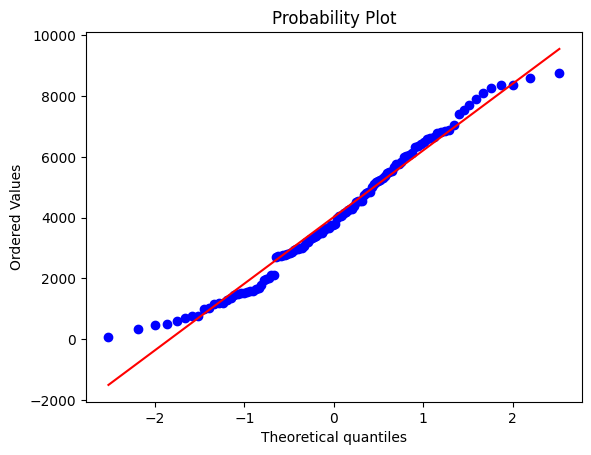

In [65]:
plt.figure()
stats.probplot(y, plot=plt)
plt.show()

# Option 1

In [66]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error

In [67]:
X = df_processed[selected_feature_names]
Y = df_processed["Rice Yield (Kg / Hectare)"]

# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    random_state=42
)

In [68]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# TRAIN THE MODEL

model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [70]:
# PREDICT ON TEST DATA

y_pred = model.predict(X_test_scaled)


In [71]:
#  MODEL ACCURACY (R² SCORE) + ERROR (MSE)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)




print(" MODEL PERFORMANCE ")
print(f"R² Score (Accuracy): {r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"MAE      : {mae:.4f}")

 MODEL PERFORMANCE 
R² Score (Accuracy): 0.9995
Mean Squared Error (MSE): 1528.2090
RMSE     : 39.0923
MAE      : 23.2755


In [72]:
#  MODEL ACCURACY (R² SCORE) + ERROR (MSE)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)

# === Adjusted R² ===
n = len(y_test)          # number of samples
k = X_test.shape[1]      # number of features
adjusted_r2 = 1 - (1 - r2) * ((n - 1) / (n - k - 1))


print(" MODEL PERFORMANCE ")
print(f"R² Score (Accuracy): {r2:.4f}")
print(f"Adjusted R²    : {adjusted_r2:.4f}")
print(f"Mean Squared Error (MSE): {mse:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"MAE      : {mae:.4f}")

 MODEL PERFORMANCE 
R² Score (Accuracy): 0.9995
Adjusted R²    : 0.9992
Mean Squared Error (MSE): 1528.2090
RMSE     : 39.0923
MAE      : 23.2755


In [73]:

importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": model.coef_
})

print("\nFEATURE IMPORTANCE:")
print(importance)


FEATURE IMPORTANCE:
                              Feature  Coefficient
0                  Acreage Efficiency  2224.907336
1                  Rank of Rice Yield   -23.916967
2              Yield Efficiency Score   -10.465057
3             Rank of Rice Production   -12.868972
4          Normalized Production Rank     1.474722
5  Rank of Rice Production Per Person    15.908693
6                Rank of Rice Acreage     7.983159
7                    Total Population   -26.214600
8              Rice Production (Tons)    28.323141
9     Rice Production Per Person (Kg)    -0.219165


# Option 2

In [74]:
y_transformed = np.log1p(y) # # log(1 + y) to avoid log(0)

Transforming improves:

linearity

model accuracy

residual normality

R² score

C:\Users\MSI PC\AppData\Local\Temp\ipykernel_13944\3642000449.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_transformed, fit=norm)


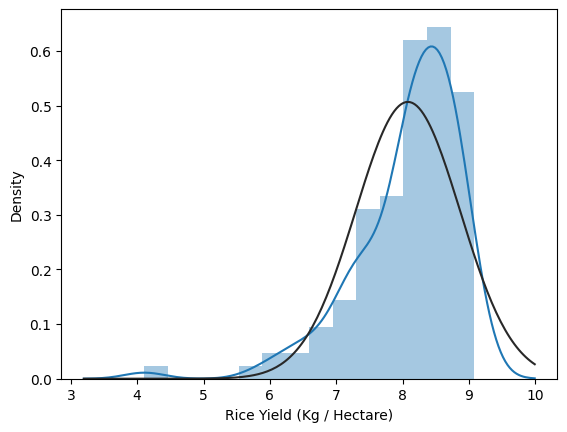

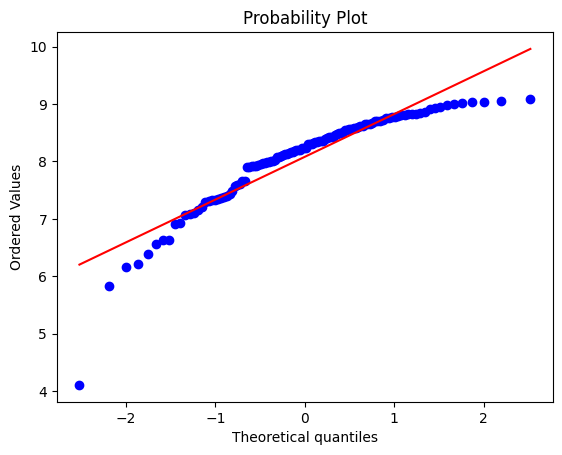

In [75]:


sns.distplot(y_transformed, fit=norm)
plt.show()

plt.figure()
stats.probplot(y_transformed, plot=plt)
plt.show()


In [76]:
X = df_processed[selected_feature_names]
# X = np.log1p(x1)
Y = df_processed["Rice Yield (Kg / Hectare)"]
#  TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y_transformed, test_size=0.2, random_state=42
)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [77]:
# TRAIN MODEL

model = LinearRegression()
model.fit(X_train_scaled, y_train)


LinearRegression()

In [78]:
# PREDICT
y_pred_log = model.predict(X_test_scaled)

# If you want prediction in real scale:
y_pred = np.expm1(y_pred_log)    # reverse log1p


In [79]:
# MODEL PERFORMANCE METRICS
# Metrics in log scale
r2 = r2_score(y_test, y_pred_log)
mse = mean_squared_error(y_test, y_pred_log)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_log)

print("=================================")
print("       MODEL PERFORMANCE")
print("=================================")
print(f"R² Score: {r2:.4f}")
print(f"MSE      : {mse:.4f}")
print(f"RMSE     : {rmse:.4f}")
print(f"MAE      : {mae:.4f}")


       MODEL PERFORMANCE
R² Score: 0.9096
MSE      : 0.0383
RMSE     : 0.1958
MAE      : 0.1581


# Option *3*

$$
y' = log(1+y)
$$

$$
y' = y^\lambda - 1/ \lambda
$$


The algorithm chooses λ (lambda) that makes your data as close to normal as possible.

 Box-Cox adapts to the data
 Box-Cox chooses the optimal λ
 No guessing
 Gives the most normal shape

Lambda: 0.6700244840331225


C:\Users\MSI PC\AppData\Local\Temp\ipykernel_13944\2951377436.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_boxcox, fit=norm)


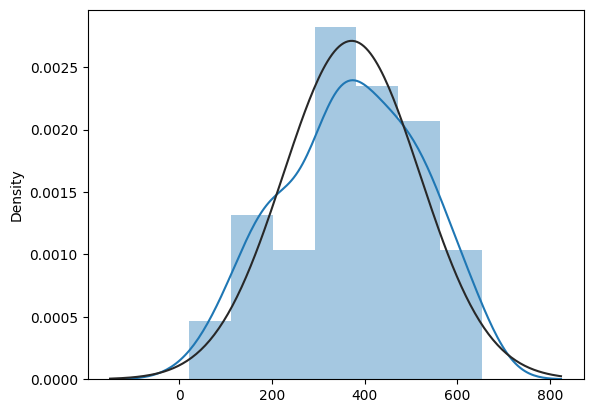

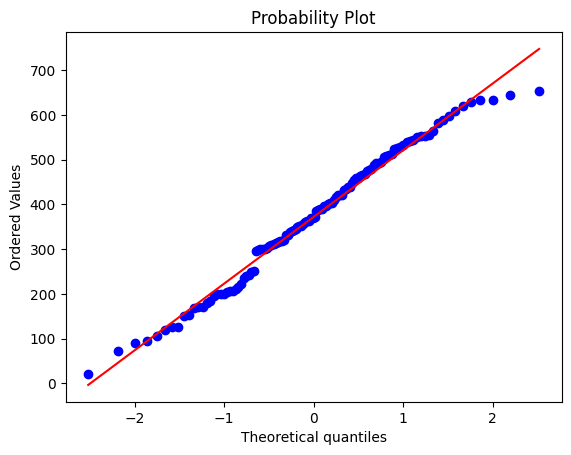

In [80]:
y_positive = y[y > 0]   # Box-Cox requires positive data
y_boxcox, lam = stats.boxcox(y_positive)

print("Lambda:", lam)

sns.distplot(y_boxcox, fit=norm)
plt.show()

stats.probplot(y_boxcox, plot=plt)
plt.show()


In [81]:
# Make sure Box-Cox works
y_boxcox_input = y + 1  # avoid zeros

# APPLY BOX-COX TRANSFORMATION
y_boxcox, best_lambda = stats.boxcox(y_boxcox_input)

print("Best lambda for Box-Cox:", best_lambda)

Best lambda for Box-Cox: 0.6700034507546345


In [82]:
# TRAIN-TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y_boxcox, test_size=0.2, random_state=42
)

In [83]:
# Train Model
model = LinearRegression()
model.fit(X_train_scaled, y_train)

LinearRegression()

In [84]:
# 6. PREDICT
y_pred_bc = model.predict(X_test_scaled)


In [85]:
# EVALUATION METRICS


r2 = r2_score(y_test, y_pred_bc)
mse = mean_squared_error(y_test, y_pred_bc)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred_bc)

print("=================================")
print("      MODEL PERFORMANCE")
print("=================================")
print(f"R² Score: {r2:.4f}")
print(f"MSE     : {mse:.4f}")
print(f"RMSE    : {rmse:.4f}")
print(f"MAE     : {mae:.4f}")


      MODEL PERFORMANCE
R² Score: 0.9931
MSE     : 111.0925
RMSE    : 10.5400
MAE     : 8.5826


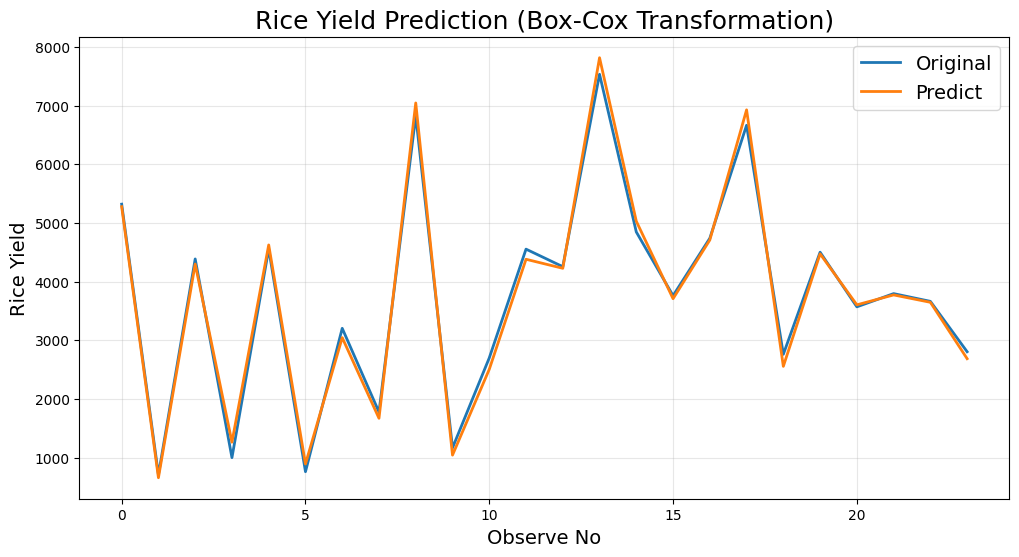

In [86]:
from scipy.special import inv_boxcox

# Get y_test_original using the indices from X_test
# Y is the original dependent variable before any transformation (from kernel state)
y_test_original = Y.loc[X_test.index]

# Inverse transform y_pred_bc to get predictions in original scale
# best_lambda was calculated in cell -VMzzN3Gui3y
y_pred_original = inv_boxcox(y_pred_bc, best_lambda)

plt.figure(figsize=(12,6))
plt.plot(y_test_original.values, label="Original", linewidth=2)
plt.plot(y_pred_original, label="Predict", linewidth=2)
plt.title("Rice Yield Prediction (Box-Cox Transformation)", fontsize=18)
plt.xlabel("Observe No", fontsize=14)
plt.ylabel("Rice Yield", fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

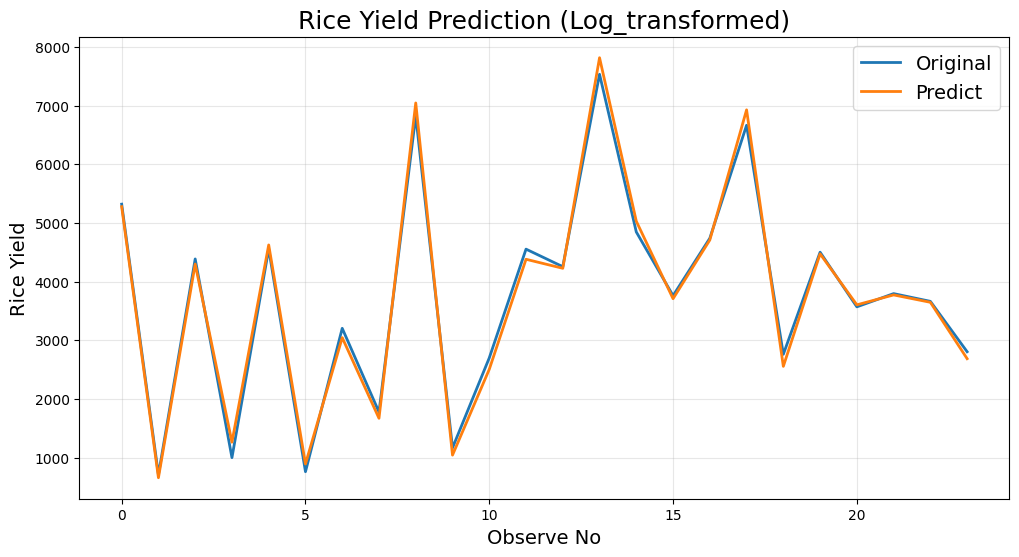

In [87]:
from scipy.special import inv_boxcox

# Get y_test_original using the indices from X_test
# Y is the original dependent variable before any transformation (from kernel state)
y_test_original = Y.loc[X_test.index]

# Inverse transform y_pred_bc to get predictions in original scale
# best_lambda was calculated in cell -VMzzN3Gui3y
y_pred = np.expm1(y_pred_log)    # reverse log1p

plt.figure(figsize=(12,6))
plt.plot(y_test_original.values, label="Original", linewidth=2)
plt.plot(y_pred_original, label="Predict", linewidth=2)
plt.title("Rice Yield Prediction (Log_transformed)", fontsize=18)
plt.xlabel("Observe No", fontsize=14)
plt.ylabel("Rice Yield", fontsize=14)
plt.legend(fontsize=14)
plt.grid(True, alpha=0.3)
plt.show()

In [88]:
import pickle

with open("model.pkl", "wb") as f:
    pickle.dump(model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

with open("lambda.pkl", "wb") as f:
    pickle.dump(lam, f)   # or boxcox_lambda

# Save selected features
with open("selected_features.pkl", "wb") as f:
    pickle.dump(selected_feature_names, f)

print("Saved all .pkl files!")


Saved all .pkl files!
